In [1]:
print('ok bro')

ok bro


In [2]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [3]:
from urllib.request import urlretrieve

In [4]:
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x27cb61d3e10>)

In [5]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd

In [7]:
medical_df = pd.read_csv('medical.csv')

In [8]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [9]:
medical_df.info()
# This method prints information about a DataFrame including
# the index dtype and columns, non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
medical_df.describe()
# Analyzes both numeric and object series, as well
# as DataFrame column sets of mixed data types. The output
# will vary depending on what is provided. Refer to the notes
# below for more detail.

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [16]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [17]:
fig = px.histogram(medical_df,
                   x='age',
                   marginal='box',
                   nbins=47,
                   title= 'Distributon Of Age'
)
fig.update_layout(bargap=0.1)
fig.show()

In [18]:
#There are twice as many customers in 18 and 19 as compared to the other ages
#This could be because it is the 18 is the legal age at which we could get insyrance at least from this company.
#The company could also offer it at a lower price when the person is young
#Another case could be that the children are now adults and have to learn how to take care of themselves so they take this insurance
#Another reason could be that the medical expenses are quite high and people of that age need insurance to pay for it
#There could be many more reasons which we are not going into right now

In [19]:
fig = px.histogram(medical_df,
                   x='bmi',
                   marginal='box',
                   color_discrete_sequence = ['magenta'],
                   title='Distribution of BMI'
)
fig.update_layout(bargap=0.1)
fig.show()

In [20]:
#This histogram looks like a gaussian distribution
#The graph follows a gaussian distribution becausee opf the following factors -
# 1.) Most poeple like to stay fit and therefore lie in the range of overweight and obesity
# 2.) There are very few people who are actually fit due to which the bmi of 18.5 to 24.9 have less values,
# 3.) There are only a few people on the two extremes of morbidy obses and underweight due to which there are very few people there
# 4.) It is not obvious that the graph will follow a normal distribution

In [21]:
 fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='smoker',
                   color_discrete_sequence = ['green', 'gray'],
                   title='Annual Medical Charges'
)
fig.update_layout(bargap=0.1)
fig.show()

In [22]:
#People who are non smoker seem to have lower medical charges
#This follows the exponential decrease distribution
#The poeple with accidents and genetic disorders have to spend more money onn expenses

In [23]:
fig = px.histogram(medical_df,
                   x='region',
                   marginal='box',
                   color_discrete_sequence = ['red'],
                   title='Distribution of region of people'
)
fig.update_layout(bargap=0.1)
fig.show()

In [24]:
fig = px.histogram(medical_df,
                   x='sex',
                   marginal='box',
                   color_discrete_sequence = ['magenta'],
                   title='Distribution of sex'
)
fig.update_layout(bargap=0.1)
fig.show()

In [25]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [26]:
px.histogram(medical_df, x='smoker', color='sex', title='Smoker')

In [27]:
fig = px.scatter(medical_df,
                 x='age',
                 y='charges',
                 color='smoker',
                 opacity = 0.8,
                 hover_data=['sex'],
                 title='Age vs Charge'
)
fig.update_traces()
fig.show()

In [28]:
fig = px.scatter(medical_df,
                 x='bmi',
                 y='charges',
                 color='smoker',
                 opacity = 0.8,
                 hover_data=['sex'],
                 title='Age vs Charge'
)
fig.update_traces()
fig.show()

In [29]:
fig = px.violin(medical_df,
                x='children',
                y='charges',
                title='No. of Children vs Charge'
)
fig.show()

In [30]:
fig = px.scatter(medical_df,
                 x='smoker',
                 y='charges',
                 color='smoker',
                 opacity = 0.8,
                 hover_data=['sex'],
                 title='Age vs Charge'
)
fig.update_traces()
fig.show()

<Axes: xlabel='smoker', ylabel='charges'>

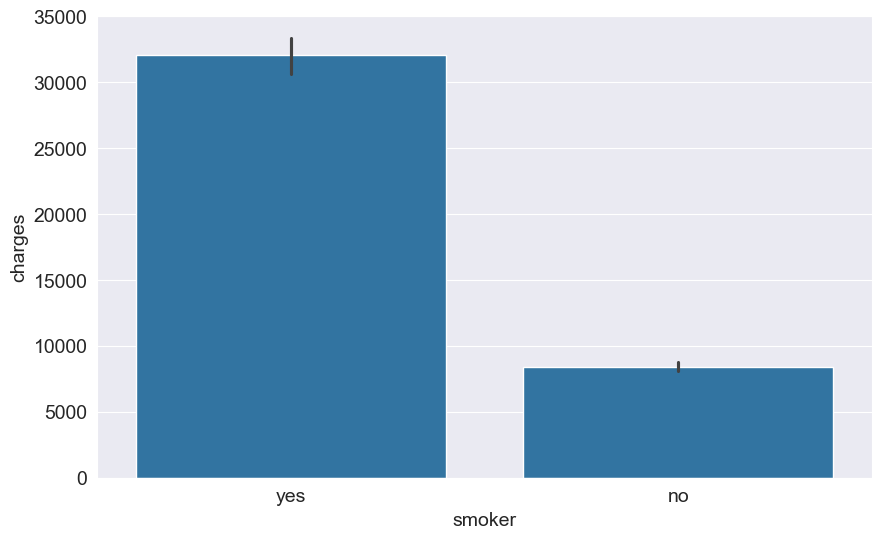

In [31]:
sns.barplot(medical_df, x='smoker', y='charges')

In [32]:
# Age and charges seem to frow together
# BMI and charges do not have that much of a trend
# Smoker and medical charges seem to be directly linked
# If a person smokes then it is observed that he/she has more medical bill

In [33]:
#Correlation
#The relationship between certain papmertes and medical charges will be observed using a correlation coefficient

In [34]:
medical_df.charges.corr(medical_df.age)

0.2990081933306478

In [35]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362887

In [36]:
medical_df.charges.corr(medical_df.children)

0.06799822684790487

In [37]:
#Converting categorical data to numerical data to apply correlation
smoker_values = { 'no':0, 'yes':1}
smoker_numeric = medical_df.smoker.map(smoker_values)
smoker_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [38]:
medical_df.smoker

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [39]:
medical_df.charges.corr(smoker_numeric)

0.7872514304984778

In [40]:
#The greater absolute the value of correlation coefficient the higher will be its correlation
# Strength: The greater the absolute value of the correlation coefficient, the stronger the relationship.

# The extreme values of -1 and 1 indicate a perfectly linear relationship where a change in one variable is accompanied by a perfectly consistent change in the other. For these relationships, all of the data points fall on a line. In practice, you won’t see either type of perfect relationship.

# A coefficient of zero represents no linear relationship. As one variable increases, there is no tendency in the other variable to either increase or decrease.

# When the value is in-between 0 and +1/-1, there is a relationship, but the points don’t all fall on a line. As r approaches -1 or 1, the strength of the relationship increases and the data points tend to fall closer to a line.

# Direction: The sign of the correlation coefficient represents the direction of the relationship.

# Positive coefficients indicate that when the value of one variable increases, the value of the other variable also tends to increase. Positive relationships produce an upward slope on a scatterplot.

# Negative coefficients represent cases when the value of one variable increases, the value of the other variable tends to decrease. Negative relationships produce a downward slope.

In [41]:
medical_df.corr(numeric_only = True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

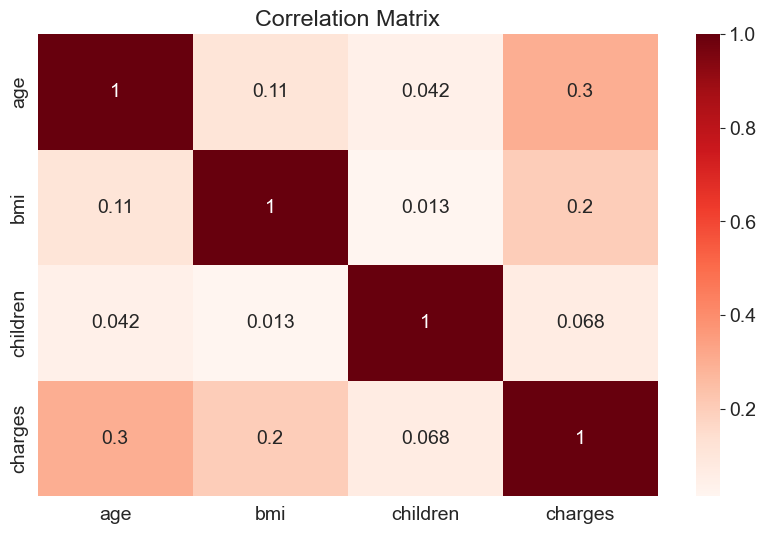

In [42]:
sns.heatmap(medical_df.corr(numeric_only = True), cmap='Reds', annot=True)
plt.title('Correlation Matrix')

In [43]:
#High correlation acnnot be used to interpret cause-effect relationship between features.
#Two features x and y can be correlated if X causes Y or Y causes X or if both are caused by Z
#Correlation will no longer hold true if onw of the cause-effect relationships is broken
#Computers cannnot differentiate between correlation and causation

In [44]:
#Linear Regression using a Single Feature
#Smoker and age have the highest correlation with charges
non_smoker_df = medical_df[medical_df.smoker == 'no']

<Axes: title={'center': 'Age vs Charges'}, xlabel='age', ylabel='charges'>

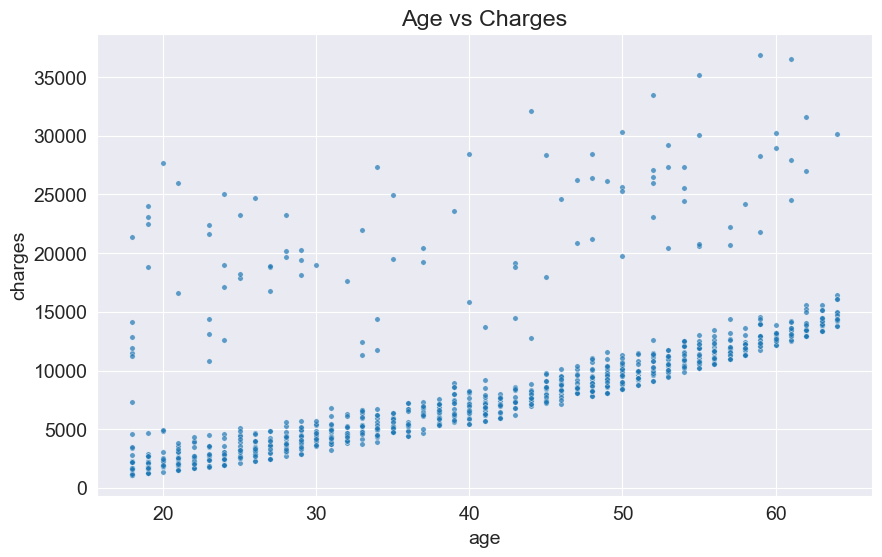

In [45]:
plt.title('Age vs Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15)

In [46]:
#The plot seems to follow a line apart from a few exceptions
def estimate_charges(age, w, b):
    return w * age + b

In [47]:
w=50
b=100

In [48]:
estimate_charges(30, w, b)

1600

In [49]:
ages = non_smoker_df.age
ages

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

In [50]:
estimated_charges = ages.apply(lambda x: estimate_charges(x, w, b))
estimated_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [51]:
non_smoker_df.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

Text(0, 0.5, 'Estimated Charges')

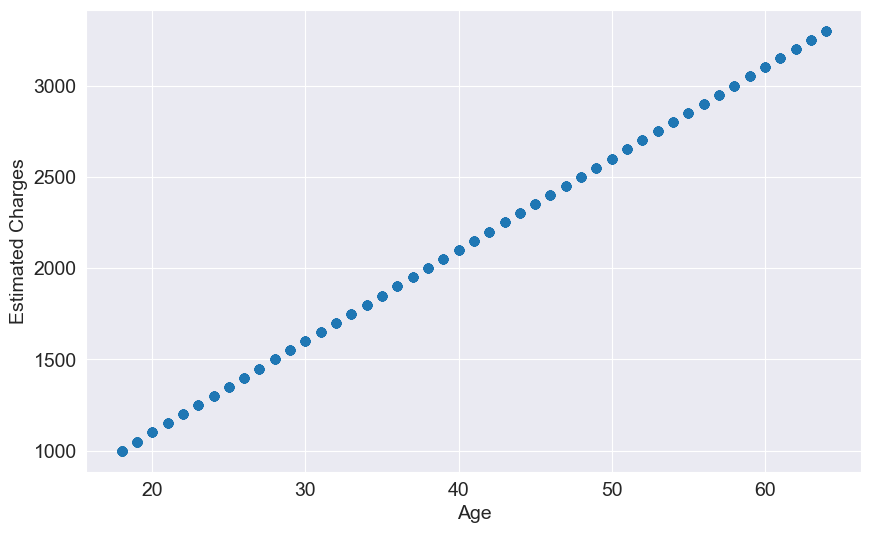

In [52]:
plt.scatter(ages, estimated_charges)
plt.xlabel('Age')
plt.ylabel('Estimated Charges')

Text(0, 0.5, 'Estimated Charges')

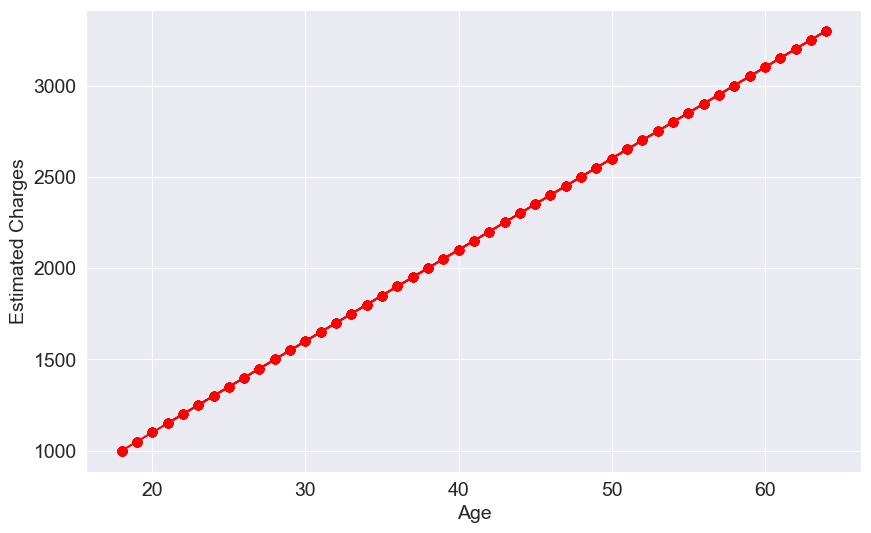

In [53]:
plt.plot(ages, estimated_charges, 'r-o')
plt.xlabel('Age')
plt.ylabel('Estimated Charges')

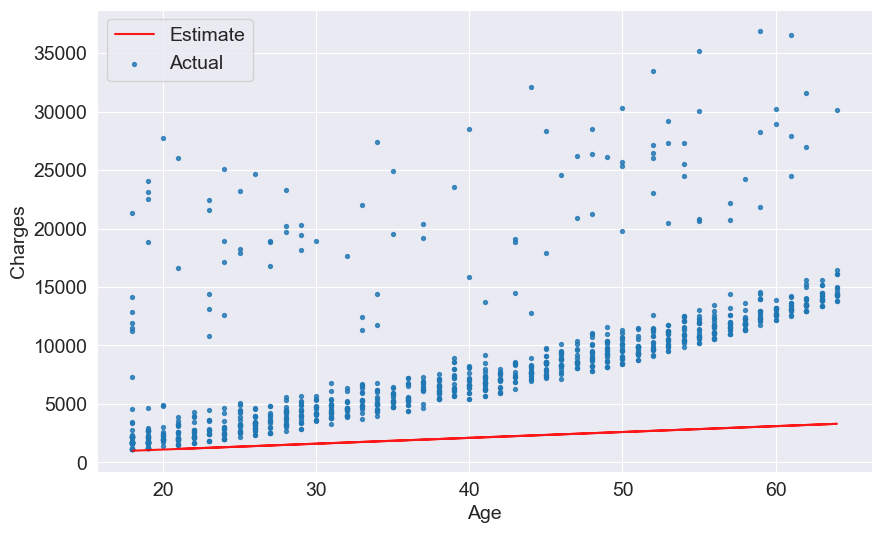

In [54]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9)

plt.scatter(ages, target, s=8, alpha=0.8)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual'])

In [55]:
def try_parameters(w,b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges

    estimated_charges = estimate_charges(ages,w,b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9)
    plt.scatter(ages, target, s=8, alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual'])

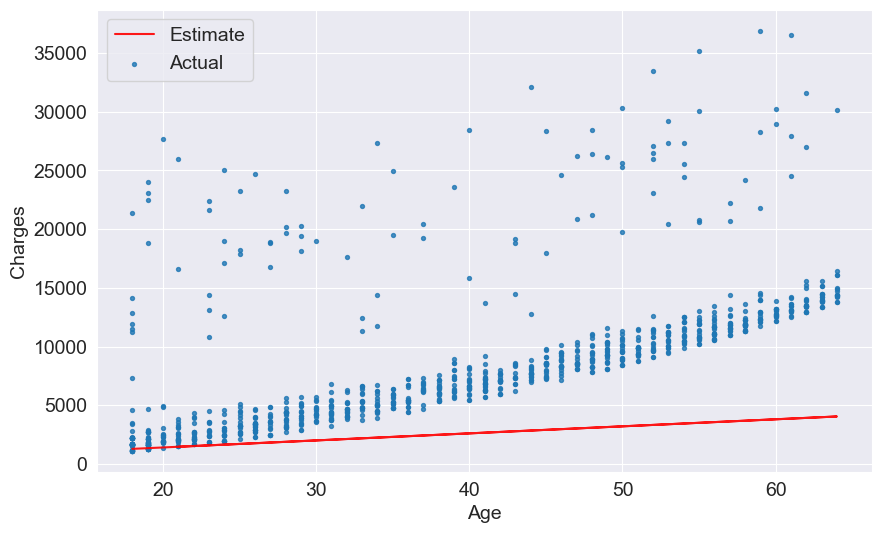

In [56]:
try_parameters(60, 200)

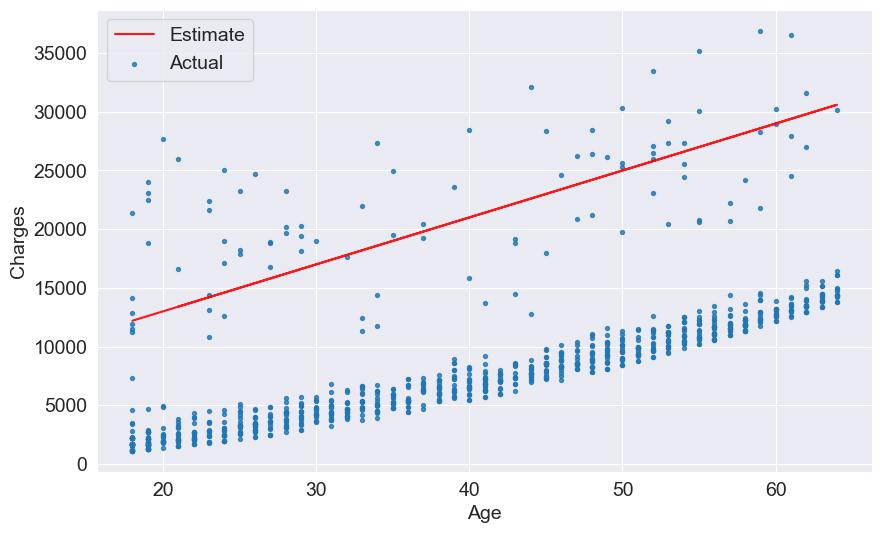

In [57]:
try_parameters(400, 5000)

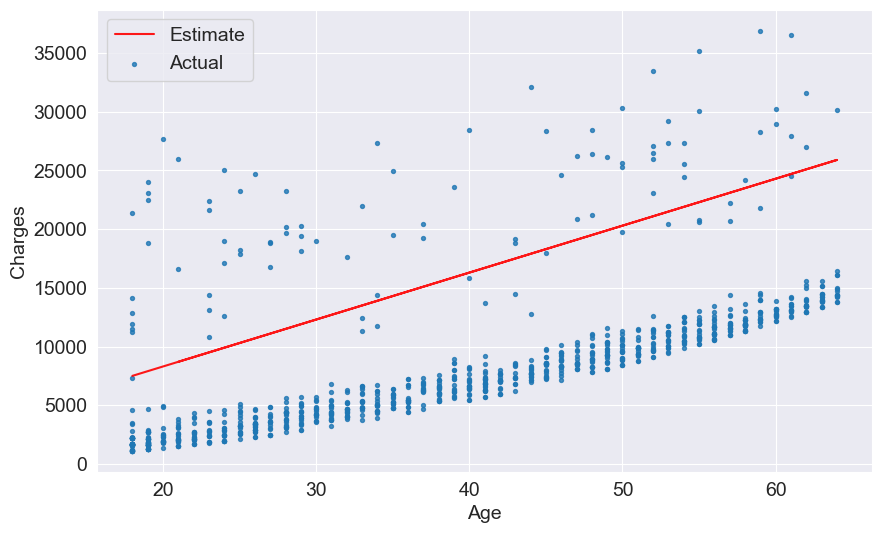

In [58]:
try_parameters(400, 300)

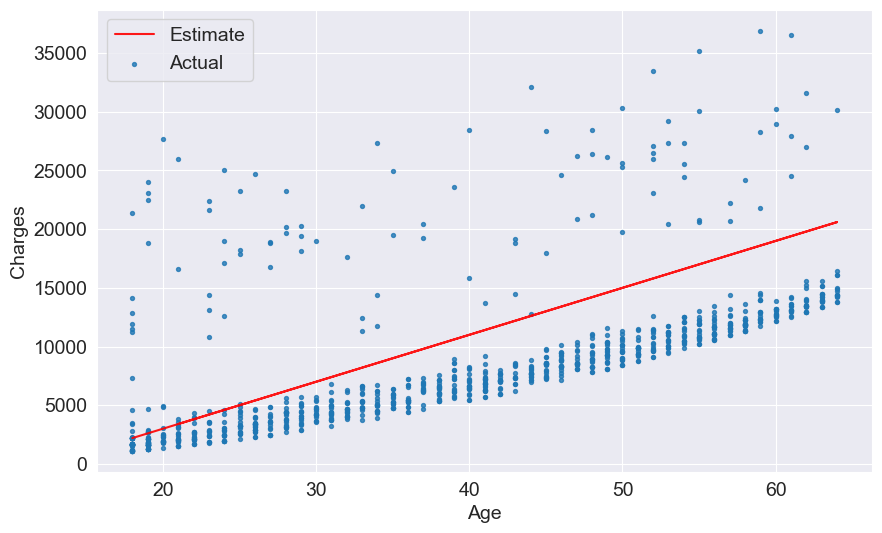

In [59]:
try_parameters(400, -5000)

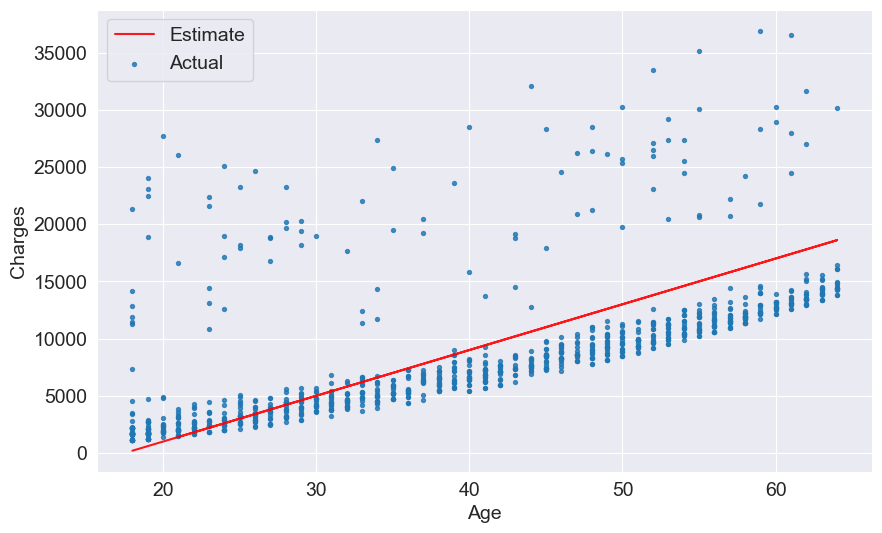

In [60]:
try_parameters(400, -7000)

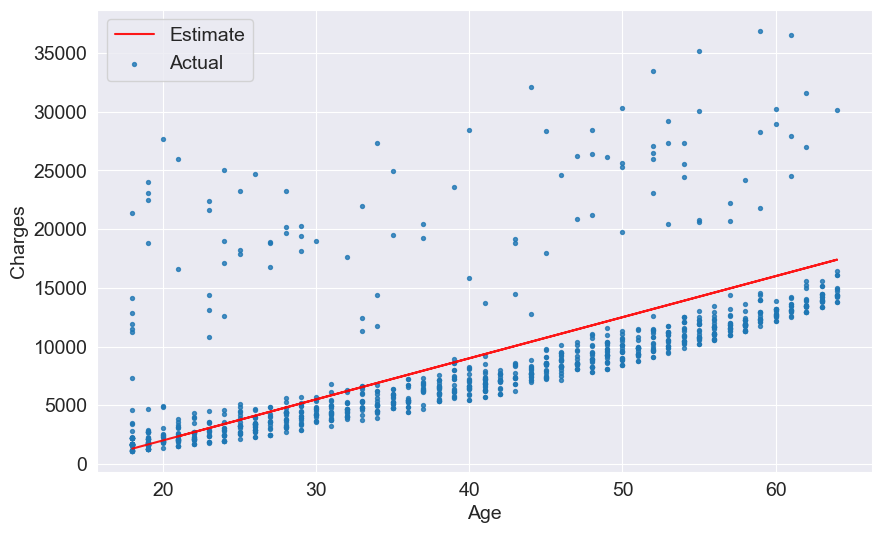

In [61]:
try_parameters(350, -5000)

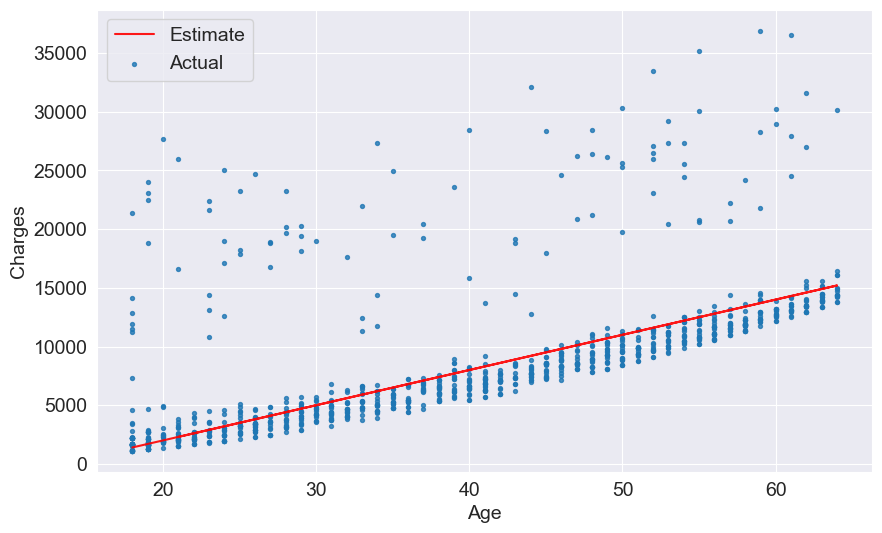

In [62]:
try_parameters(300, -4000)

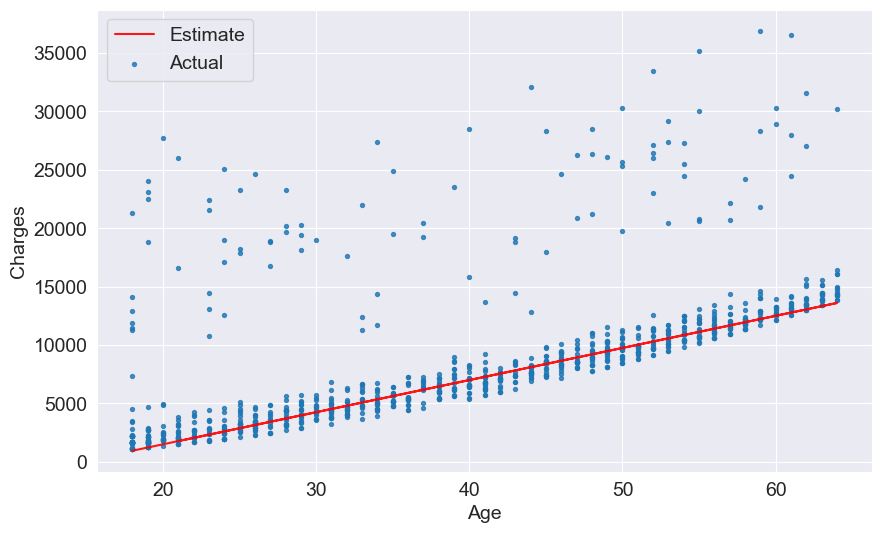

In [63]:
try_parameters(275, -4000)

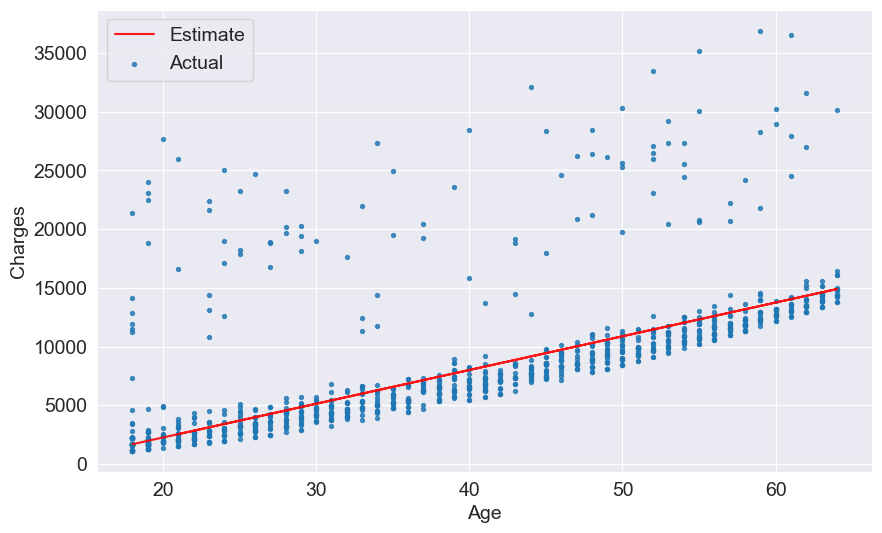

In [64]:
try_parameters(287.5, -3500)

In [65]:
targets = non_smoker_df.charges
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [66]:
predictions = estimated_charges
predictions

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [67]:
import numpy as np

In [68]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets-predictions)))

In [69]:
w=287.5
b=-3500

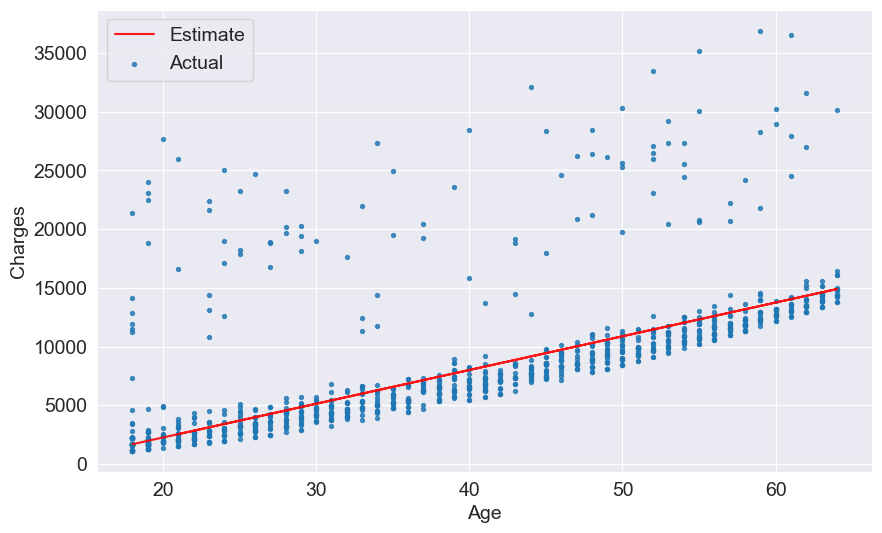

In [70]:
try_parameters(w,b)

In [71]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [72]:
rmse(targets, predicted)

4711.000527508154

In [73]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages,w,b)

    plt.plot(ages, predictions, 'r', alpha=0.9)
    plt.scatter(ages, target, s=8, alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Predictions', 'Actual'])

    loss = rmse(target, predictions)
    print("RMSE Loss:", loss)

RMSE Loss: 7916.352238635186


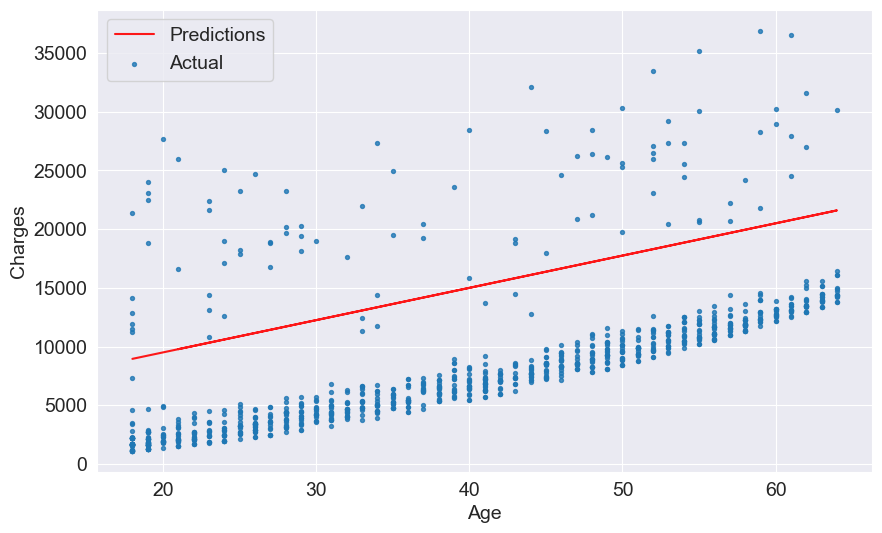

In [74]:
try_parameters(275,4000)

RMSE Loss:

 4931.676876077655


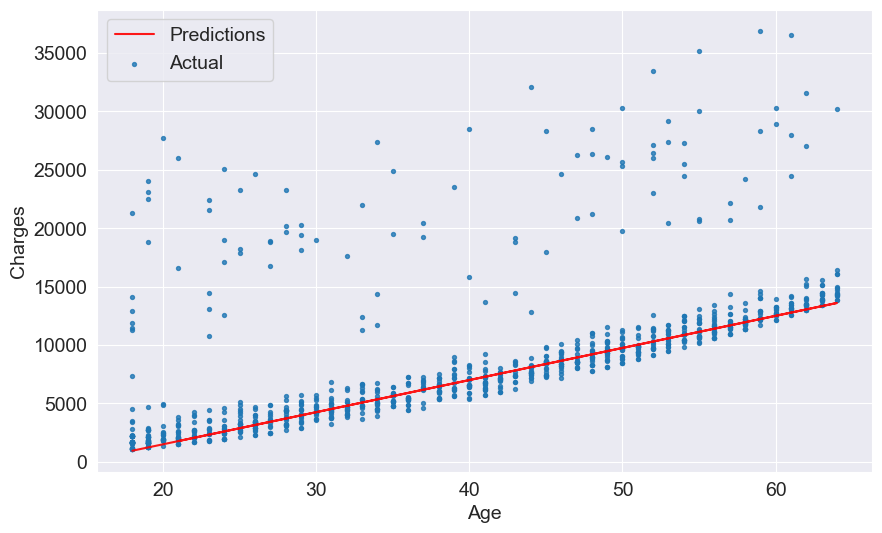

In [75]:
try_parameters(275,-4000)

RMSE Loss: 4792.5083784272765


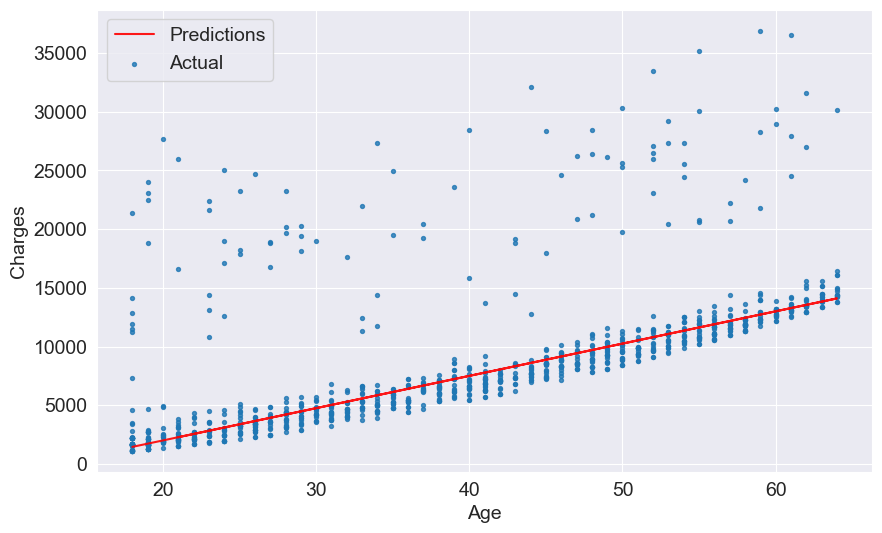

In [76]:
try_parameters(275,-3500)

RMSE Loss:

 9550.580578276289


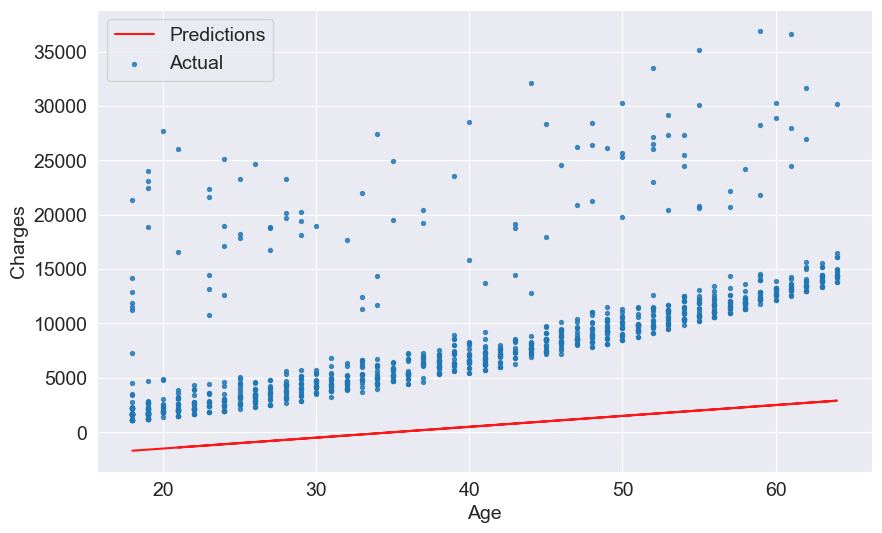

In [77]:
try_parameters(100,-3500)

RMSE Loss: 4749.896602231691


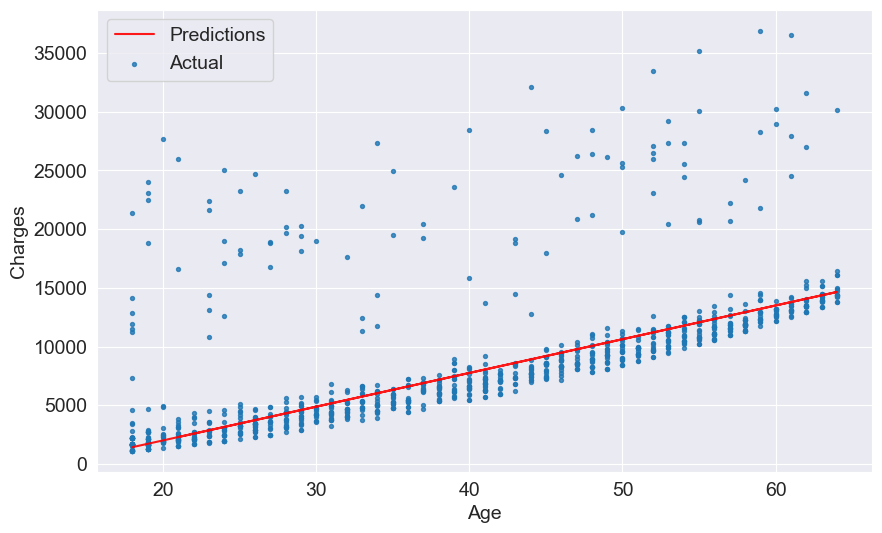

In [78]:
try_parameters(287.5,-3750)

RMSE Loss: 4711.000527508154


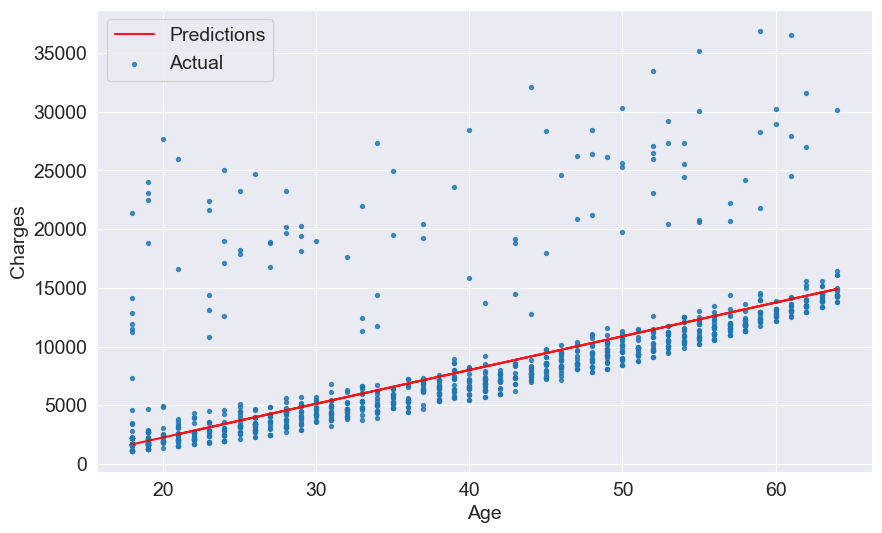

In [79]:
try_parameters(287.5,-3500)

In [80]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [81]:
from sklearn.linear_model import LinearRegression

In [82]:
model = LinearRegression()

In [83]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [84]:
inputs = non_smoker_df['age']
print(type(inputs))
print(inputs.shape)

<class 'pandas.core.series.Series'>
(1064,)


In [85]:
#The upper inputs will not satisfy fit as it requires an array like
# X : {array-like, sparse matrix} of shape (n_samples, n_features)
#So we will use another approach

In [86]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('inputs.shape:', inputs.shape)
print('targets.shape:', targets.shape)

inputs.shape: (1064, 1)
targets.shape: (1064,)


In [87]:
#Now we are satisfying all the required parameters

In [88]:
model.fit(inputs, targets)

LinearRegression()

In [89]:
model.predict(np.array([[23],
                        [37],
                        [61]]))

c:\Users\Avichal Dwivedi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [90]:
predictions = model.predict(inputs)

In [91]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [92]:
inputs

,age
1,18
2,28
3,33
4,32
5,31
...,...
1332,52
1333,50
1334,18
1335,18


In [93]:
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [94]:
rmse(targets, predictions)

4662.505766636395

In [95]:
model.coef_

array([267.24891283])

In [96]:
model.intercept_

-2091.4205565650864

RMSE Loss: 4662.505766636395


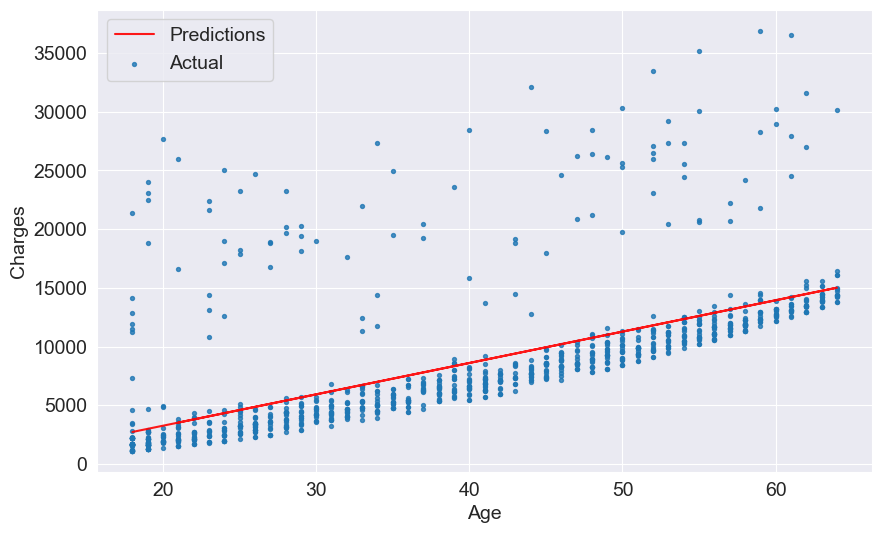

In [97]:
try_parameters(model.coef_, model.intercept_)

In [98]:
#Now we will train a linear regression model with smokers
smoker_df = medical_df[medical_df.smoker == 'yes']
smoker_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


In [99]:
inputs = smoker_df[['age']]
targets = smoker_df.charges

In [100]:
model.fit(inputs, targets)

LinearRegression()

In [101]:
predictions=model.predict(inputs)
predictions

array([26093.642567  , 39218.85945773, 28535.54338388, 29451.25619021,
       30672.20659865, 29756.49379232, 27009.35537333, 28840.78098599,
       30977.44420076, 38608.38425351, 31282.68180287, 34945.53302819,
       31282.68180287, 37997.90904929, 25788.40496489, 36471.72103874,
       26398.88016911, 28840.78098599, 28535.54338388, 27009.35537333,
       31587.91940498, 34029.82022186, 37692.67144718, 38303.1466514 ,
       39829.33466195, 37387.43384507, 31893.15700709, 38913.62185562,
       26398.88016911, 39524.09705984, 29146.0185881 , 33724.58261975,
       26093.642567  , 30061.73139443, 30672.20659865, 29451.25619021,
       34335.05782397, 33114.10741553, 34945.53302819, 25788.40496489,
       29451.25619021, 33114.10741553, 25788.40496489, 39524.09705984,
       31282.68180287, 28535.54338388, 30977.44420076, 26093.642567  ,
       33114.10741553, 32503.63221131, 26093.642567  , 27314.59297544,
       39524.09705984, 25788.40496489, 39524.09705984, 36776.95864085,
      

In [102]:
rmse(targets, predictions)

10711.00334810241

In [103]:
print(model.coef_ ,"\n", model.intercept_)

[305.23760211] 
 20294.12812691597


In [104]:
#Regression using age and bmi
#charges = w1*age w2*bmi + b
#Create Inputs and charges
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']

#Create and train the model
model = LinearRegression().fit(inputs, targets)

#Generate Predictions
predictions = model.predict(inputs)

#Compare loss to evaluate the model
loss = rmse(targets, predictions)
print("Loss:", loss)

Loss: 4662.3128354612945


In [105]:
#BMI did not create a major impact because it does not have much of a relation with the non-smokers
fig = px.scatter(non_smoker_df, x='bmi', y='charges', title='BMI vs Charges')
fig.update_traces(marker_size = 5)
fig.show()

In [106]:
model.coef_,  model.intercept_

(array([266.87657817,   7.07547666]), -2293.6320906488727)

In [107]:
fig = px.scatter_3d(non_smoker_df, x='age', y='bmi', z='charges')
fig.update_traces(marker_size=3, marker_opacity=0.5)
fig.show()

In [108]:
#Linear Regreassion USing BMI Alone
inputs, targets = non_smoker_df[['bmi']], non_smoker_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets, predictions)
print("Loss:", loss)
model.coef_,  model.intercept_


Loss: 5969.772531913293


(array([83.35055766]), 5879.424081872975)

In [109]:
#This is useless because there is no relationship between BMI and charges
#We also saw that in the scatterplot earlier

In [110]:
non_smoker_df.charges.corr(non_smoker_df['children'])

0.13892870453542205

In [111]:
fig = px.strip(non_smoker_df, x='children', y='charges', title= "Children vs. Charges")
fig.update_traces(marker_size=4, marker_opacity=0.7)
fig.show()

In [112]:
#Linear Regression using children, bmi and age
#charges = w1*age w2*bmi + w3*children + b

# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4608.470405038246


In [113]:
#Linear Regression for smokers using all the three parameters
# Create inputs and targets
inputs, targets = smoker_df[['age', 'bmi', 'children']], smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 5718.202480524154


In [114]:
#Linear regression on the entire dataset using age, bmi and children
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 11355.317901125973


In [115]:
px.scatter(medical_df, x='age', y='charges', color='smoker')

In [116]:
#Now we will have to use categorical features for machine learning
#This is because we can see that the smokers and non-smokers have a great gap so we cannot make a best fit line here
#We will have to assign numerical values to smoker to be able to use it in linear regression
#Method 1
#We can replace no with 0 and 1 with yes for smoker
#Another weight will be added when the person is smoker
#Method 2
#If a categorical column has more than 2 categories then we can peform one-hot encoding
#This means we can create a new column for each category with 1s and 0s
#Method 3
#If the new categories have a natural order(eg- cold, neutral, warm, hot)
#Then they can be converted into numbers(eg- 1,2,3,4) preserving the order. These are called ordinals


<Axes: xlabel='smoker', ylabel='charges'>

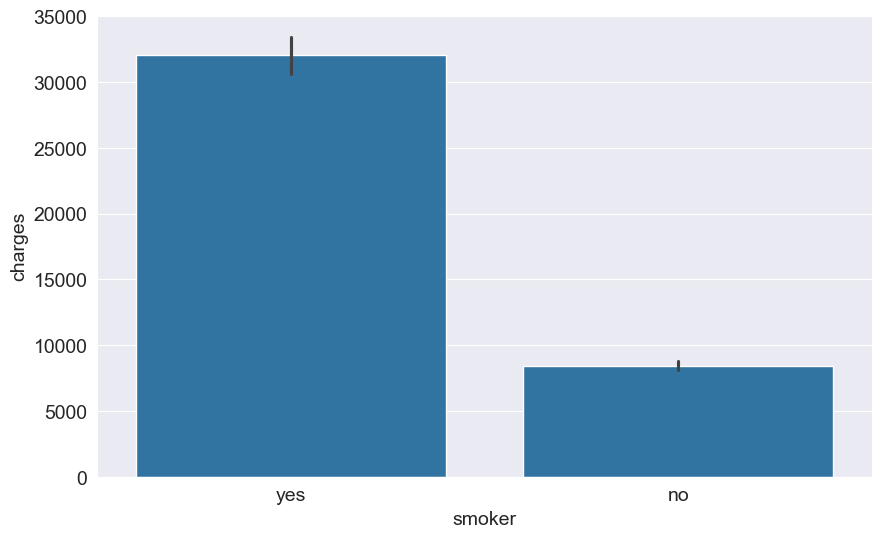

In [117]:
sns.barplot(data=medical_df, x='smoker', y='charges')

In [118]:
smoker_codes = {'no':0, 'yes':1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [119]:
#We will use smoker_code panel for Linear Regression
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.439217188081


<Axes: xlabel='sex', ylabel='charges'>

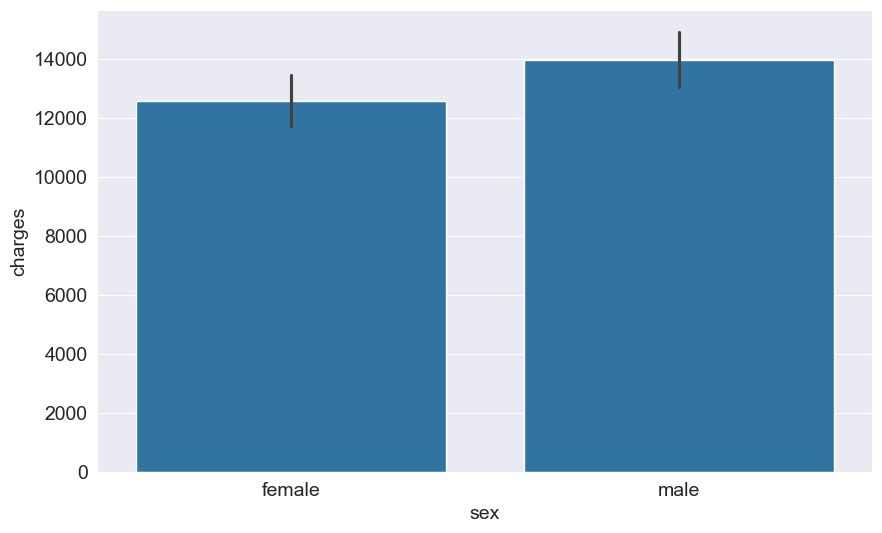

In [120]:
#There is a major redi=uction in this
sns.barplot(data=medical_df, x='sex', y='charges')

In [121]:
sex_codes = {'female':0, 'male':1}
medical_df['sex_code'] = medical_df.sex.map(sex_codes)
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [122]:
#Linear Regression with 5 values

# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.100708754546


In [123]:
#There is no real change because there is very less correlation
medical_df.charges.corr(medical_df.sex_code)

0.05729206220202533

<Axes: xlabel='region', ylabel='charges'>

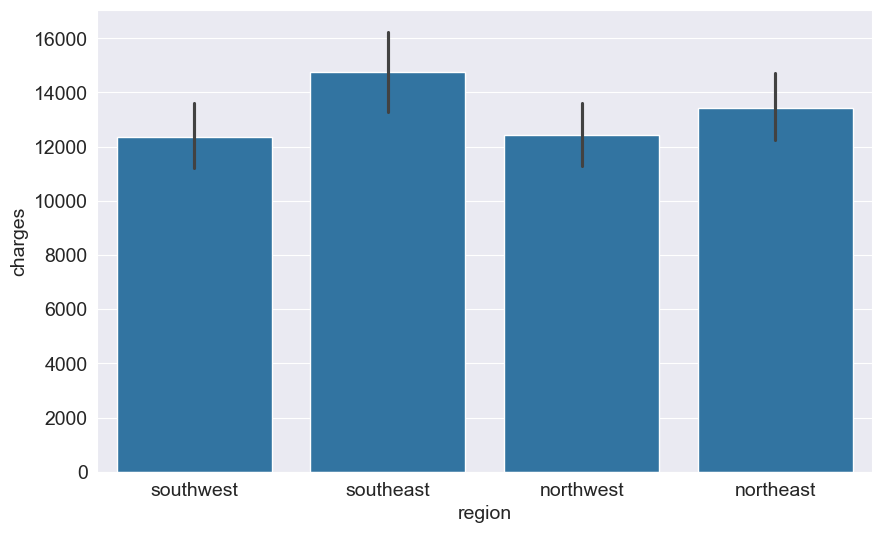

In [124]:
#Now we will use one-hot-encoding for create a new column for each region
sns.barplot(data=medical_df, x='region', y='charges')

In [125]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [126]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [127]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [128]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [143]:
#Now we will do linear regression using all the data that are available to us
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code','sex_code','northeast','northwest','southeast','southwest']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515


In [130]:
#Here the least we are getting is 6041 but when we were using non_smoker and smoker seperately then we were getting in the range of 4000
#Therefore it will be better to make a linear regression model for both of them seperately

In [131]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(smoker_df[['region']])
enc.categories_
one_hot = enc.transform(smoker_df[['region']]).toarray()
one_hot
smoker_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

C:\Users\Avichal Dwivedi\AppData\Local\Temp\ipykernel_22708\302765127.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Avichal Dwivedi\AppData\Local\Temp\ipykernel_22708\302765127.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Avichal Dwivedi\AppData\Local\Temp\ipykernel_22708\302765127.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [132]:
sex_codes = {'female':0, 'male':1}
smoker_df['sex_code'] = smoker_df.sex.map(sex_codes)
smoker_df

C:\Users\Avichal Dwivedi\AppData\Local\Temp\ipykernel_22708\1125371504.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,0.0,0.0,0.0,1.0,0
11,62,female,26.290,0,yes,southeast,27808.72510,0.0,0.0,1.0,0.0,0
14,27,male,42.130,0,yes,southeast,39611.75770,0.0,0.0,1.0,0.0,1
19,30,male,35.300,0,yes,southwest,36837.46700,0.0,0.0,0.0,1.0,1
23,34,female,31.920,1,yes,northeast,37701.87680,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600,0.0,0.0,0.0,1.0,0
1314,30,female,23.655,3,yes,northwest,18765.87545,0.0,1.0,0.0,0.0,0
1321,62,male,26.695,0,yes,northeast,28101.33305,1.0,0.0,0.0,0.0,1
1323,42,female,40.370,2,yes,southeast,43896.37630,0.0,0.0,1.0,0.0,0


In [133]:
#Now we will do linear regression on smoker using all the data that are available to us
# Create inputs and targets
inputs, targets = smoker_df[['age', 'bmi', 'children','sex_code','northeast','northwest','southeast','southwest']], smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 5668.4678821121515


In [134]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(non_smoker_df[['region']])
enc.categories_
one_hot = enc.transform(non_smoker_df[['region']]).toarray()
one_hot
non_smoker_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

C:\Users\Avichal Dwivedi\AppData\Local\Temp\ipykernel_22708\276619361.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Avichal Dwivedi\AppData\Local\Temp\ipykernel_22708\276619361.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Avichal Dwivedi\AppData\Local\Temp\ipykernel_22708\276619361.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [135]:
sex_codes = {'female':0, 'male':1}
non_smoker_df['sex_code'] = non_smoker_df.sex.map(sex_codes)
non_smoker_df

C:\Users\Avichal Dwivedi\AppData\Local\Temp\ipykernel_22708\940826386.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest,sex_code
1,18,male,33.770,1,no,southeast,1725.55230,0.0,0.0,1.0,0.0,1
2,28,male,33.000,3,no,southeast,4449.46200,0.0,0.0,1.0,0.0,1
3,33,male,22.705,0,no,northwest,21984.47061,0.0,1.0,0.0,0.0,1
4,32,male,28.880,0,no,northwest,3866.85520,0.0,1.0,0.0,0.0,1
5,31,female,25.740,0,no,southeast,3756.62160,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500,0.0,0.0,0.0,1.0,0
1333,50,male,30.970,3,no,northwest,10600.54830,0.0,1.0,0.0,0.0,1
1334,18,female,31.920,0,no,northeast,2205.98080,1.0,0.0,0.0,0.0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0.0,0.0,1.0,0.0,0


In [136]:
#Now we will do linear regression on non_smoker using all the data that are available to us
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi', 'children','sex_code','northeast','northwest','southeast','southwest']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4573.074988795492


In [137]:
#As we can see BMI is not having that much of an effect on non_smoker as in smoker so we can remove bmi form non_smoker
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'children','sex_code','northeast','northwest','southeast','southwest']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4574.371058365766


In [138]:
#BMI on the other hand has a major impact on the smokers
# Create inputs and targets
inputs, targets = smoker_df[['age', 'children','sex_code','northeast','northwest','southeast','southwest']], smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

#The rmse value does from 5000 to 10000 range when we remove BMI

Loss: 10452.805450676284


In [139]:
loss

10452.805450676284

In [140]:
model.coef_

array([  303.31544727,    69.52540541,  2114.63186224, -2009.5303178 ,
       -1695.34630391,  2632.11028054,  1072.76634116])

In [141]:
model.intercept_

18812.664327053237

In [144]:
#To run this go again to cell number 129 that is the cell number in which the Linear Regreassiion model based on the entire medical_df was trained
model.predict([[28, 30, 2, 1, 0, 0, 1, 0, 0]])

c:\Users\Avichal Dwivedi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([29875.81463599])

In [145]:
#We will categorize all the numeric values with mean=0 and std deviation =1
#We will transform them into normal distribution

In [146]:
from sklearn.preprocessing import StandardScaler

In [147]:
numeric_cols = ['age', 'bmi', 'children']
scalar = StandardScaler()
scalar.fit(medical_df[numeric_cols])

StandardScaler()

In [148]:
scalar.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [149]:
scalar.var_

array([197.25385199,  37.16008997,   1.45212664])

In [150]:
#We will now use the data as follows
scaled_inputs = scalar.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [151]:
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'southeast', 'northwest', 'southwest']
categotical_data = medical_df[cat_cols].values

In [152]:
inputs

,age,bmi,children,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,27.900,0,1,0,0.0,0.0,0.0,1.0
1,18,33.770,1,0,1,0.0,0.0,1.0,0.0
2,28,33.000,3,0,1,0.0,0.0,1.0,0.0
3,33,22.705,0,0,1,0.0,1.0,0.0,0.0
4,32,28.880,0,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,0.0,1.0,0.0,0.0
1334,18,31.920,0,0,0,1.0,0.0,0.0,0.0
1335,18,36.850,0,0,0,0.0,0.0,1.0,0.0
1336,21,25.800,0,0,0,0.0,0.0,0.0,1.0


In [153]:
inputs = np.concatenate((scaled_inputs, categotical_data), axis=1)
targets = medical_df.charges

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6042.523199044168


In [154]:
new_customers = [[28, 30, 2, 1, 0, 0, 1, 0, 0]]

In [155]:
scalar.transform([[28,30,2]])

c:\Users\Avichal Dwivedi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([[-0.79795355, -0.10882659,  0.75107928]])

In [156]:
model.predict([[-0.79795355, -0.10882659,  0.751079281,1, 0, 0, 1, 0, 0]])

array([29328.])